In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [73]:
df = pd.read_csv('XY_train.csv').drop(columns=['ID'])
categorical_columns = df.select_dtypes(exclude=['float64', 'int64'])

indexed_mappings = {}
for col in categorical_columns.columns:
    unique_values = df[col].unique()
    mapping = {value: idx for idx, value in enumerate(unique_values)}
    indexed_mappings[col] = mapping

indexed_mappings

{'GENDER': {'female': 0, 'male': 1},
 'EDUCATION': {'high school': 0, 'none': 1, 'university': 2},
 'INCOME': {'upper class': 0,
  'poverty': 1,
  'middle class': 2,
  'working class': 3},
 'VEHICLE_YEAR': {'after 2015': 0, 'before 2015': 1},
 'VEHICLE_TYPE': {'sedan': 0, 'sports car': 1}}

In [74]:
# apply mapping to df
for col, mapping in indexed_mappings.items():
    df[col] = df[col].map(mapping)

In [75]:
df

,GENDER,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,PAST_ACCIDENTS,AGE,DRIVING_EXPERIENCE,OUTCOME
0,0,0,0,0.545417,1,0,1,1,10238,8000.0,0,4,6,80,39,0
1,1,1,1,0.361876,0,1,1,1,10238,9000.0,0,0,0,26,2,1
2,0,2,2,0.535840,1,1,1,0,10238,12000.0,0,0,0,29,7,0
3,0,0,0,0.612545,1,0,1,0,32765,9000.0,0,3,0,60,13,0
4,1,2,2,0.474268,1,1,0,0,32765,13000.0,0,0,0,52,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1,0,0,0.693325,1,1,1,1,10238,14000.0,0,3,3,70,35,0
7996,1,2,3,0.521957,1,0,0,0,10238,11000.0,0,0,0,25,4,0
7997,0,2,0,0.626010,1,0,1,1,10238,NaN,0,0,2,76,39,0
7998,1,2,0,0.740884,1,0,1,1,10238,8000.0,0,1,5,54,28,0


/var/folders/02/br71h3395qgfk17xb1jm5qfw0000gp/T/ipykernel_8916/2861193438.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


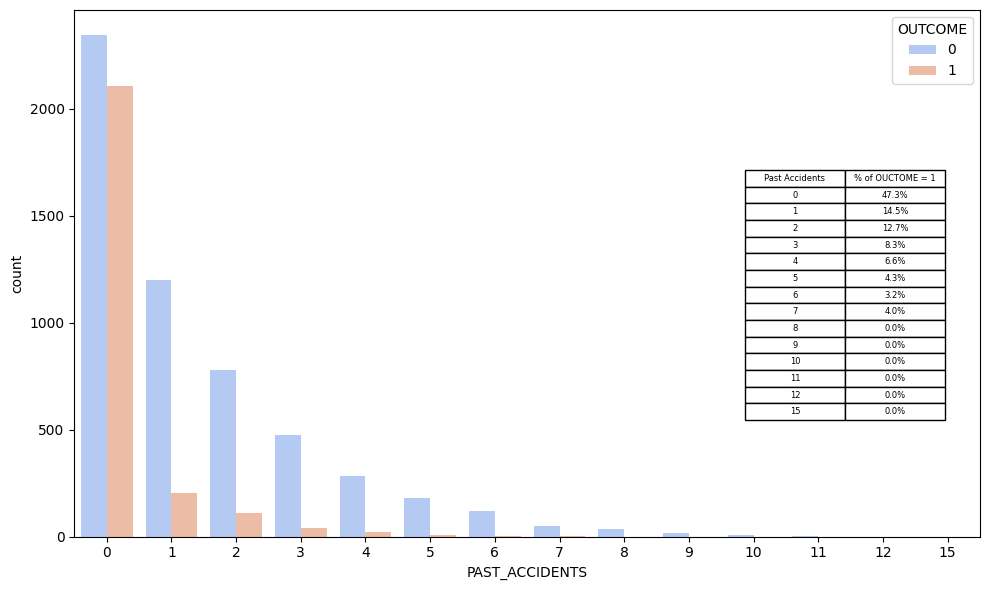

In [177]:
# OUTCOME - PAST Accidents
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df,
    x='PAST_ACCIDENTS',
    hue='OUTCOME',  # הצגת OUTCOME בצבעים שונים
    palette='coolwarm'
)

percentage_dict = {}
filtered_df = df[df['OUTCOME'] == 1]

for value in df['PAST_ACCIDENTS'].unique():
    count = filtered_df[filtered_df['PAST_ACCIDENTS'] == value].shape[0]  # Count where OUTCOME = 1
    total = df[df['PAST_ACCIDENTS'] == value].shape[0]  # Total count for this value
    percentage_dict[value] = (count / total) * 100 if total > 0 else 0  # Calculate percentage

percentage_table_data = pd.DataFrame({
    'Past Accidents': list(percentage_dict.keys()),
    '% of OUCTOME = 1': [f'{value:.1f}%' for value in percentage_dict.values()]
}).sort_values(by=['Past Accidents'], ascending = True)


# Add the table
table_ax = plt.gcf().add_axes([0.75, 0.2, 0.2, 0.6])  # Add a subplot for the table
table_ax.axis('tight')
table_ax.axis('off')

# Create the table
table_data = percentage_table_data.values
table_columns = percentage_table_data.columns
table_ax.table(cellText=table_data, colLabels=table_columns, loc='center', cellLoc='center')

# Titles and labels
plt.xlabel('Number of Past Accidents', fontsize=10)
plt.ylabel('Count', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

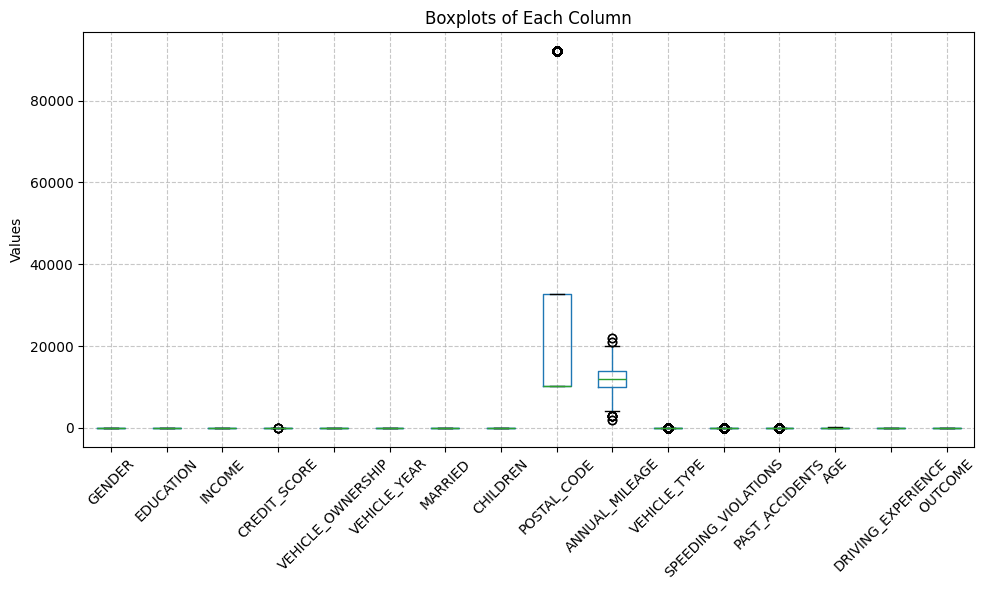